<a href="https://colab.research.google.com/github/joan-chep/WEEK_8_IP_CORE/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2022_02_Joan_Chepkwony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAIROBI HOSPITAL TEST FOR HYPOTHYROIDISM.**bold text**

**1. Defining the Question**.

To Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**2. Defining the Metric of Success.**

We will achieve our onbjectives when;

(a) The model achieves atleast 80% accuracy

(b) Identify the most crucial independent variables that affect Hypothyroidism

(c) Have the lowest RMSE score.

**3. Understanding the Context**.


Hypothyroidism (also called underactive thyroid, low thyroid or hypothyreosis) is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone. It can cause a number of symptoms, such as poor ability to tolerate cold, a feeling of tiredness, constipation, slow heart rate, depression, and weight gain.
Occasionally there may be swelling of the front part of the neck due to goiter. Untreated cases of hypothyroidism during pregnancy can lead to delays in growth and intellectual development in the baby or congenital iodine deficiency syndrome.

**Although anyone can develop hypothyroidism, you're at an increased risk if you**:

Are a woman

Are older than 60

Have a family history of thyroid disease

Have an autoimmune disease, such as type 1 diabetes or celiac disease

Have been treated with radioactive iodine or anti-thyroid medications

Received radiation to your neck or upper chest

Have had thyroid surgery (partial thyroidectomy)

Have been pregnant or delivered a baby within the past six months.

**4. Recording the Experimental Design.**

The project will be undertaken through the following procedure;

Loading Data

Exploratory Data Analysis

Data Cleaning

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Modelling

Decision Trees: Random Forests , Ada Boosted Trees , Gradient Boosted Trees

Support Vector Machines: Kernel = polynomial , linear , rbf

Conclusion

**5. Data Relevance**

Relevance of our data will be determined by the following factors;

How accurate is the data at predicting whether a patient has hypothyroidism or not?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

**Importing Libraries**

In [1]:
#importing our libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Loading the Data**

In [2]:
# Reading the dataset
df = pd.read_csv('/content/hypothyroid.csv')

**Viewing the Dataset**

In [3]:
# Checking for the first five of the dataset dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
# Checking for the last five values of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
# Checking for datatypes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
# Checking for the shape of the dataset
df.shape

(3163, 26)

The dataset has 3163 rows and 26 columns

In [7]:
# checking the columns in the dataset
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [8]:
#checking for the data description
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


The output shows that there is a special character in our dataset(?)

**Data Cleaning**

There are no null values in the dataset.

In [10]:
#checking for missing values
df1 = df.replace(['?'], np.nan)
df1.isnull().sum().sum()

5329

There are 5329 missing values in total.

In [11]:
#viewing the null values per column
df1.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [14]:
# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
 # Iterating through each column in the dataframe
for column in df1.columns:           
# Printing the column name
 print(column)
# Printing out the unique values in each column                             
 print(df1[column].unique())
# Printing out the number of unique values in each column     
 print(df1[column].nunique()) 
# Creating a new line filled with . to separate the columns     
 print('\n............................')     

status
['hypothyroid' 'negative']
2

............................
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
92

............................
sex
['M' 'F' nan]
2

............................
on_thyroxine
['f' 't']
2

............................
query_on_thyroxine
['f' 't']
2

............................
on_antithyroid_medication
['f' 't']
2

............................
thyroid_surgery
['f' 't']
2

............................
query_hypothyroid
['f' 't']
2

............................
query_hyperthyroid
['f' 't']
2

............................
pregnant
['f' 't']


From our observation we can see that

**Categorical columns **bold text** **= [ ' sex ' , ' on_thyroxine ' ,' query_on_thyroxine ' ,' on_antithyroid_medication ' , ' thyroid_surgery ' , ' query_hypothyroid ' , ' query_hyperthyroid ' , ' pregnant ' , 'sick ' , ' tumor ', ' lithium ' , ' goitre ' , ' TSH_measured ', ' T3_measured ' , ' TT4_measured ' , ' T4U_measured ' , ' FTI_measured' , ' TBG_measured ' ]

**Numerical columns** = [ ' age ' , ' TSH ' , ' T3 ' , ' TT4 ' , ' T4U ' , ' FTI ' , ' TBG ' ]

In [15]:
#changing the column datatypes
# Changing the columns dtypes so that we can impute them
# Creating two lists, 
# An array of numerical columns
# An array of categorical columns

#creating a copy
df2 = df1

#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']

# Using a conditional for loop to convert each columns into the right data types

for column in df2.columns:
  if column in numerical_columns:
    df2[column]= pd.to_numeric(df2[column])
  
  else:
    df2[column] = df2[column].astype('category')
    
    
# checking the data types to confirm changes

df2.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

TBG Column

In [16]:
#creating a copy and dropping the TBG column since it has too many null values which
#means that it does not give any meaningful information. 
df3 = df2.drop(['TBG'], axis =1)
df3.head(5)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   category
 1   age                        2717 non-null   float64 
 2   sex                        3090 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   category
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

In [17]:
#replace the null values in the age column with the mean age
#creating a copy
df4 = df3
df4['age']= df3['age'].fillna(df3['age'].mean(), axis = 0)

In [18]:
#replace the null values in the sex column with the modal value
#creating a copy
df5 = df4
df5['sex']= df4['sex'].fillna(df4['sex'].mode(), axis = 0)

In [19]:
#The null values are in all the numerical column
#defining the array of numerical columns to use.
numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']

#creating a copy
df6 = df5

#dropping the null values and assigning the resultant values to a new dataframe
df6[numerical_columns_2] = df5[numerical_columns_2].fillna(0)
df6[numerical_columns_2].head()

,TSH,T3,TT4,T4U,FTI
0,30.0,0.6,15.0,1.48,10.0
1,145.0,1.7,19.0,1.13,17.0
2,0.0,0.2,4.0,1.00,0.0
3,430.0,0.4,6.0,1.04,6.0
4,7.3,1.2,57.0,1.28,44.0


**Duplicated Values**

In [20]:
#checking the duplicated rows in the dataset
df6.duplicated().sum()

152

There are 152 duplicates 

In [21]:
# dropping the duplicates
# Creating another copy
df7 = df6.drop_duplicates()
df7.shape

(3011, 25)

**Exploratory Data Analysis**

Univariate Analysis

Visualizations Using Histograms

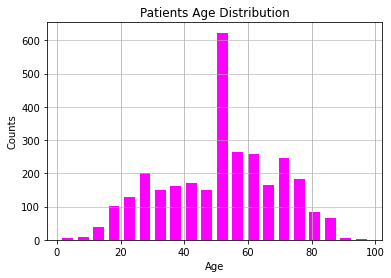

In [29]:
# Visualizing the age distribution
size, scale = 1500, 20
age = df7['age']
age.plot.hist(grid=True, bins=20, rwidth=0.7, color='magenta')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)


From the observation the age distribution shows a normal distribution

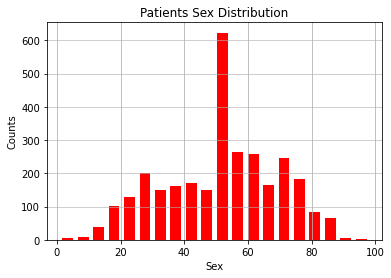

In [32]:
# Visualizing the age distribution
size, scale = 1500, 20
sex = df7['sex']
age.plot.hist(grid=True, bins=20, rwidth=0.7, color='red')
plt.title('Patients Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

From the observation the Patients Sex shows a normal distribution.

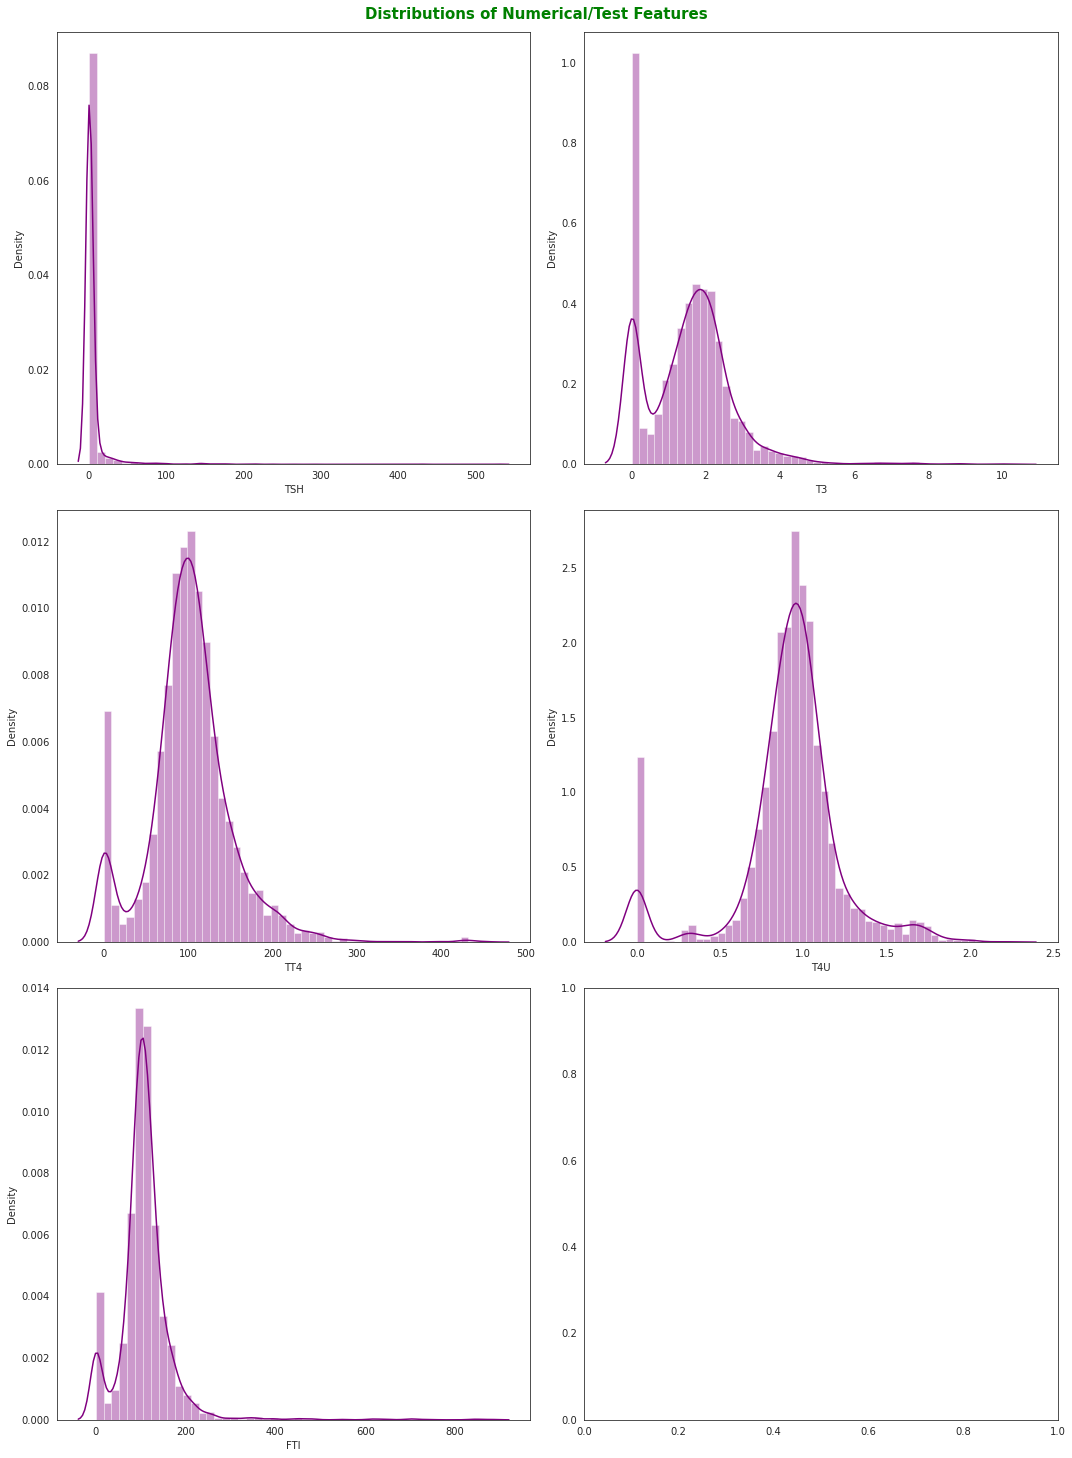

In [39]:
# Histograms of the numerical columns
# these columns represent the measures of the thyroid tests.

# First we create an array of the numerical columns
numerical_columns_3 = ['TSH','T3','TT4','T4U','FTI']

#visualizing the distributions using histograms
sns.set_style('white')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (15, 20))
fig.suptitle('Distributions of Numerical/Test Features', y= 1.01, color = 'green', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), df7, numerical_columns_3):
  sns.distplot(df7[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()
plt.show()

TSH,T3,TT4 and FT1 re skewed to the left

Visualizations using Countplot

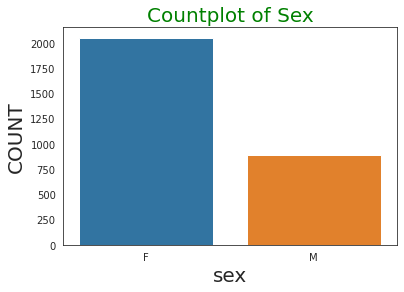

In [41]:
#visualizing the distribution of sex in the dataset
sns.countplot('sex',data = df7)
plt.xlabel("sex",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.title("Countplot of Sex",fontsize=20,color="green")
plt.show()

From the observation in the countplot is is visible that Females have a higher risk of contracting hypothyroidism.

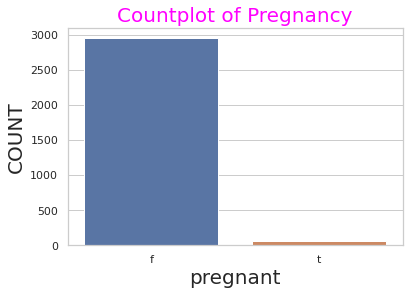

In [45]:
#visualizing the distribution of pregnancy in the dataset
sns.countplot('pregnant',data = df7)
plt.xlabel("pregnant",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.title("Countplot of Pregnancy",fontsize=20,color="magenta")
plt.show()

From the observation pregnant women have a high risk of contracting hypothyroidism as  compared to those not pregnant.

Checking for Outliers

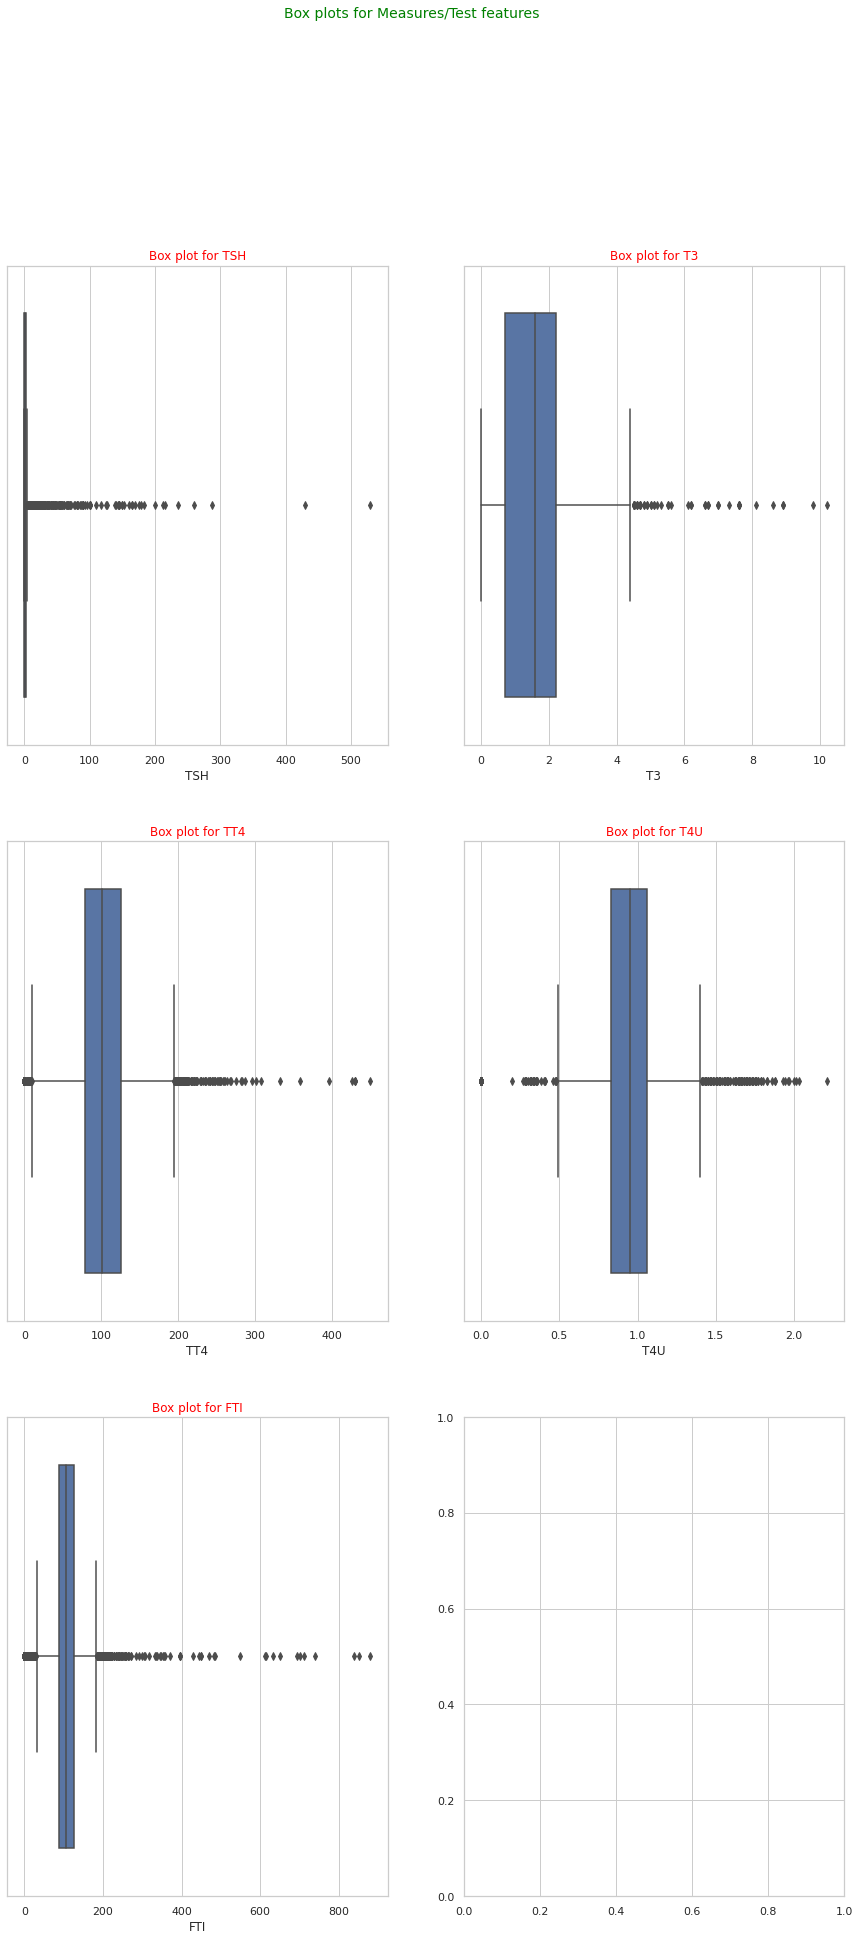

In [44]:
# We will use a boxplot to check for outliers
# we will use the list of measures/tests earlier created

# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,30))

# labeling the title
fig.suptitle('Box plots for Measures/Test features', y= 1, color = 'green', fontsize = 14)

sns.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), df7, numerical_columns_3):
  sns.boxplot(df7[name], ax = ax)
  ax.set_title('Box plot for '+ name, color='red')
  
plt.show()

The observation shows thata there are outliers in the dataset but we will not drop them since they represent true values of our data.

**Bivariate Analysis**

Checking for Multicollinearity

Heatmap

In [50]:
# Correlation
# This is the association between numerical variables in the dataset
# Computing the correlation matrix 

df7.corr()

# for better interpretation we will a heatmap; a visual.

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.008882,-0.092772,-0.024667,-0.063006,0.057734
TSH,0.008882,1.000000,-0.092486,-0.242139,0.089875,-0.199480
T3,-0.092772,-0.092486,1.000000,0.463470,0.417634,0.290009
TT4,-0.024667,-0.242139,0.463470,1.000000,0.546467,0.738844
T4U,-0.063006,0.089875,0.417634,0.546467,1.000000,0.100747
FTI,0.057734,-0.199480,0.290009,0.738844,0.100747,1.000000


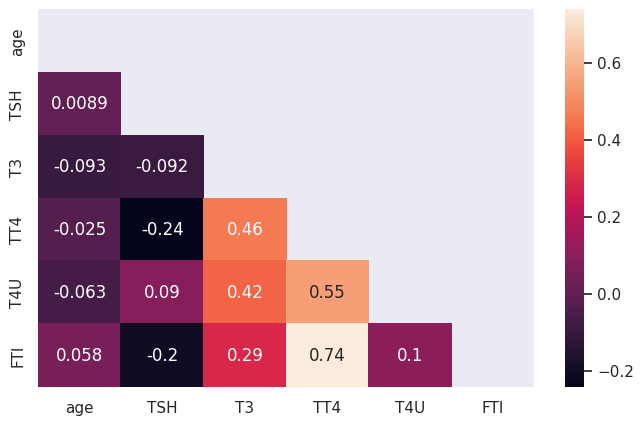

In [51]:
# Ploting a heatmat
# using seaborn 
# 

sns.set(style = 'darkgrid', context = 'notebook')
corr = df7.corr()
plt.figure(dpi = 100, figsize = (8,5))
heatmap = np.zeros_like(df7.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(df7.corr(), annot=True, mask=heatmap)
plt.show()

T4U and TT4; FTI and TT4 are highly correlated.

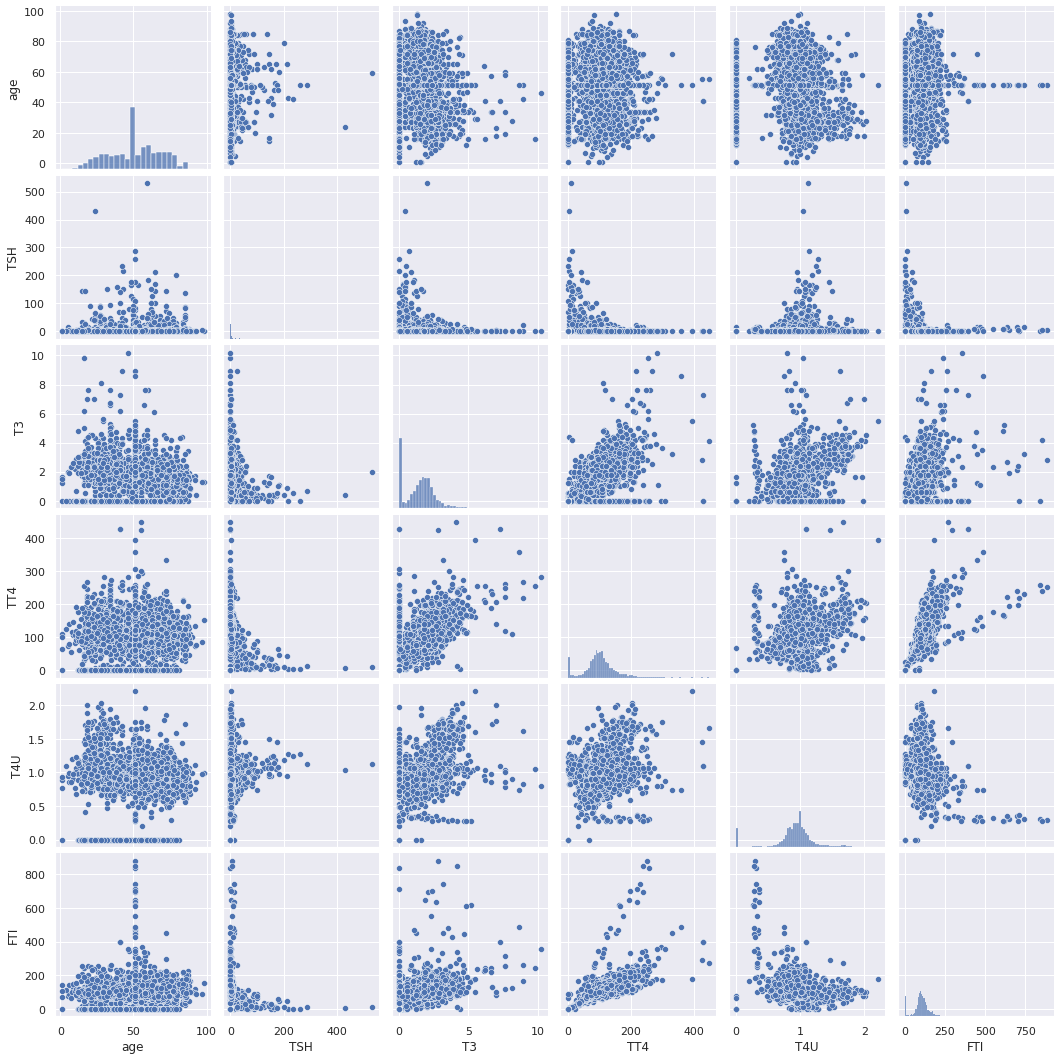

In [52]:
# Use of a pairplot to check for correlation between variables.

sns.pairplot(df7, kind = 'scatter', dropna = False)
plt.show()

<function matplotlib.pyplot.show>

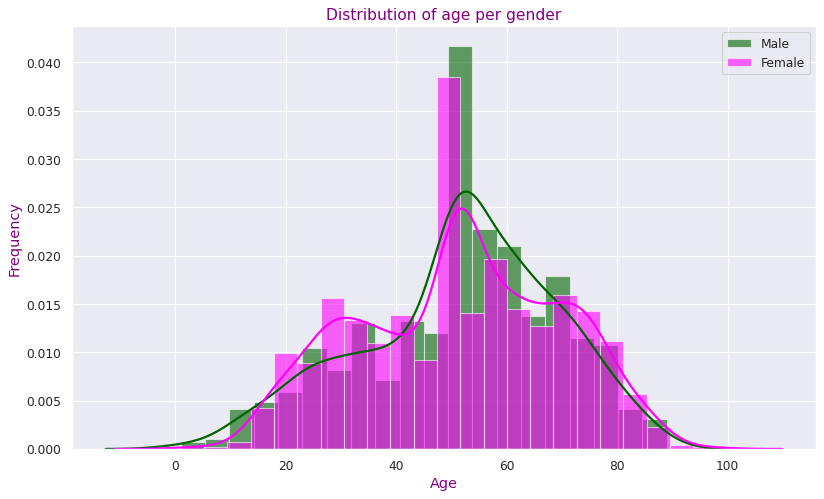

In [56]:
# Plotting histogram to show distribution of age per gender
# 
male = df7.loc[df7.sex=='M', 'age']    # Selecting only male datapoints in the age column
female = df7.loc[df7.sex=='F', 'age']  # Selecting only female datapoints in the age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="fuchsia", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show

Multivariate Analysis

Principal Components Analysis

In [57]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = df7.drop('status', axis=1)

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query3hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df8 = pd.DataFrame(dic.items())
df8

,0,1
0,PC0,thyroid_surgery
1,PC1,query_on_thyroxine
2,PC2,sex
3,PC3,age
4,PC4,on_thyroxine
5,PC5,query_hyperthyroid
6,PC6,query3hypothyroid
7,PC7,pregnant
8,PC8,T3
9,PC9,TT4


The dataframe above shows 10 features that explain the most variance in the data

**Performing Modelling**

Logistic Regression

In [58]:
# Creating a baseline model, i.e logistic regression
# Importing the relevant libraries
from sklearn.linear_model import LogisticRegression

y = df7.status.cat.codes

# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

In [59]:
print('accuracy_score:',accuracy_score (y_test , y_pred))
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

accuracy_score: 0.9856194690265486
F1_score, average = micro: 0.9856194690265486
F1_score, average = macro: 0.8992515881248555
F1_score, average = weighted: 0.9853099067294102


array([[ 27,   8],
       [  5, 864]])

The Model has an accuracy score of 98.6% from the F1 score

**Decision Trees**

Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
2141,1,1
566,1,1
2714,1,1
2600,1,1
1941,1,1


In [68]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))

R2 score : 0.70
accuracy_score: 0.9889380530973452
F1_score, average = micro: 0.9889380530973452
F1_score, average = macro: 0.9164911502789788
F1_score, average = weighted: 0.9882497214791185


In [69]:
#assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.011061946902654867
Mean Squared Error: 0.011061946902654867
Root Mean Squared Error: 0.10517579047791781


In [70]:
# Visualizing tree number 20

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 50

tree = forest.estimators_[20]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

ModuleNotFoundError: ignored

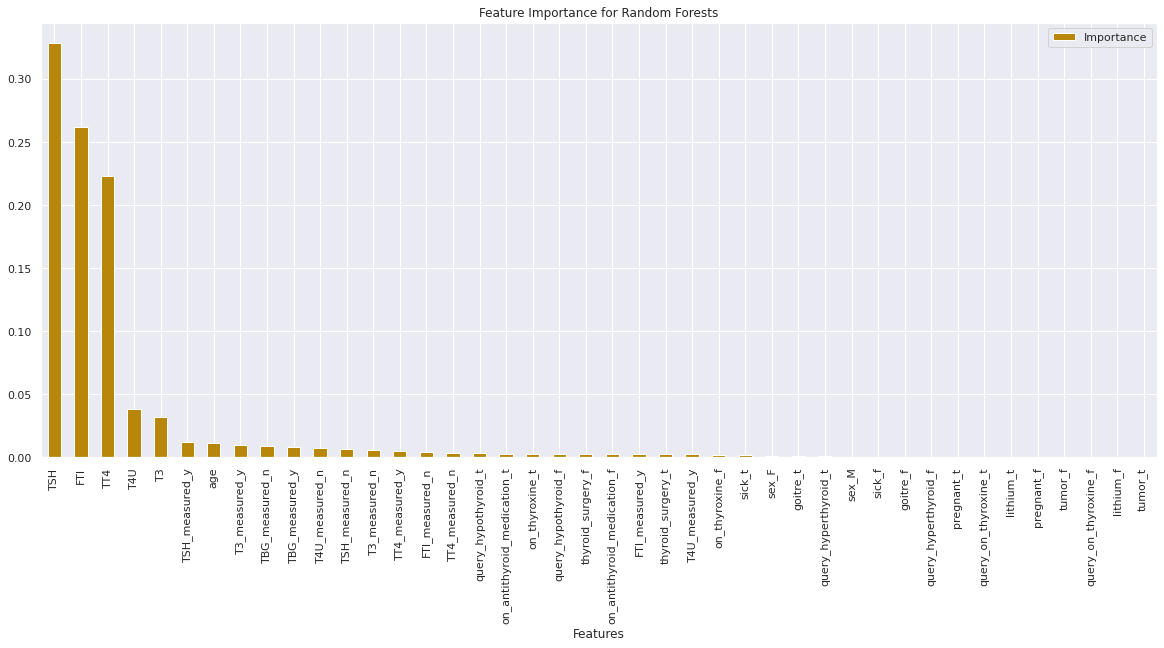

In [71]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'darkgoldenrod')
plt.show()

Ada boosted Trees

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

accuracy_score(y_test, y_pred_ada)

0.9933628318584071

The accuracy score is 99.33. This is a high score

In [73]:
print('F1_score, average = micro:',f1_score(y_test, y_pred_ada, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_ada, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_ada, average='weighted'))

F1_score, average = micro: 0.9933628318584071
F1_score, average = macro: 0.9554167351635706
F1_score, average = weighted: 0.9933628318584071


In [74]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

{'n_estimators': 250}

Gradient Boosted Trees

In [75]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9612831858407079

In [76]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))

print('accuracy_score:',accuracy_score (y_test , y_pred_gbc))
print('F1_score, average = micro:',f1_score(y_test, y_pred_gbc, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_gbc, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_gbc, average='weighted'))

R2 score : -0.04
accuracy_score: 0.9612831858407079
F1_score, average = micro: 0.9612831858407079
F1_score, average = macro: 0.49012972363226165
F1_score, average = weighted: 0.9423069244168925


The accuracy score of Gradient Boosted Trees is 96.13% while the accuracy score of Ada Boosted Trees was 99.33%. This shows that Ada Boosted Tress has the highest.

**Support Vector Machines(SVM Model)**

Kernel = Polynomial

In [77]:
# Selecting the independent variables and the target variable
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='poly',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
poly_pred = polyclassifier.predict(X_test)
accuracy_score(y_test, poly_pred)

0.9612831858407079

In [78]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred, average='weighted'))

F1_score, average = micro: 0.9612831858407079
F1_score, average = macro: 0.49012972363226165
F1_score, average = weighted: 0.9423069244168925


The Kernel = Polynomial has an accuracy of 96.13%

Kernel = Linear

In [79]:
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X_train, y_train)
poly_pred1 = polyclassifier1.predict(X_test)
accuracy_score(y_test, poly_pred1)

0.9878318584070797

In [80]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred1, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred1, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred1, average='weighted'))

F1_score, average = micro: 0.9878318584070797
F1_score, average = macro: 0.9171271178671734
F1_score, average = weighted: 0.9877471820711037


The Kernel = Linear model has an accuracy score of 98.78%.

Kernel = rbf

In [81]:
from sklearn.svm import SVC
# Building the model 
polyclassifier2 = SVC(kernel='rbf',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier2.fit(X_train, y_train)
poly_pred2 = polyclassifier2.predict(X_test)
accuracy_score(y_test, poly_pred2)

0.9601769911504425

In [82]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred2, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred2, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred2, average='weighted'))

F1_score, average = micro: 0.9601769911504425
F1_score, average = macro: 0.489841986455982
F1_score, average = weighted: 0.9417537305978946


The Kernel = rbf model has an accuracy score of 96.02%

The Kernel = Linear model predicts the output with the highest accuracy of 98.78% as compaired to Kernel = Polynomial and Kernel = rbf with accuracy of 96.13% and 96.02% respectively.

**Challenging The Solution**

In [85]:
# to get the most importantfeatures
tree = forest.estimators_[50]

features = X

importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]
# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances
#the list below shows the most important features in the data and the value of how important they are.
# the most important feature is TT4 and it accounts for 79% importance

[('TT4', 0.79),
 ('TSH', 0.07),
 ('T3_measured_n', 0.07),
 ('FTI', 0.02),
 ('goitre_f', 0.02),
 ('T4U', 0.01),
 ('query_hyperthyroid_t', 0.01),
 ('age', 0.0),
 ('T3', 0.0),
 ('sex_F', 0.0),
 ('sex_M', 0.0),
 ('on_thyroxine_f', 0.0),
 ('on_thyroxine_t', 0.0),
 ('query_on_thyroxine_f', 0.0),
 ('query_on_thyroxine_t', 0.0),
 ('on_antithyroid_medication_f', 0.0),
 ('on_antithyroid_medication_t', 0.0),
 ('thyroid_surgery_f', 0.0),
 ('thyroid_surgery_t', 0.0),
 ('query_hypothyroid_f', 0.0),
 ('query_hypothyroid_t', 0.0),
 ('query_hyperthyroid_f', 0.0),
 ('pregnant_f', 0.0),
 ('pregnant_t', 0.0),
 ('sick_f', 0.0),
 ('sick_t', 0.0),
 ('tumor_f', 0.0),
 ('tumor_t', 0.0),
 ('lithium_f', 0.0),
 ('lithium_t', 0.0),
 ('goitre_t', 0.0),
 ('TSH_measured_n', 0.0),
 ('TSH_measured_y', 0.0),
 ('T3_measured_y', 0.0),
 ('TT4_measured_n', 0.0),
 ('TT4_measured_y', 0.0),
 ('T4U_measured_n', 0.0),
 ('T4U_measured_y', 0.0),
 ('FTI_measured_n', 0.0),
 ('FTI_measured_y', 0.0),
 ('TBG_measured_n', 0.0),
 ('TBG_m

The most important feature is TT4 because it has 79% importance

In [86]:
#creating a new set of independent variables based on their importance
X1 = pd.get_dummies(df7)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9612831858407079

From the code we can see that we have an accuracy of 96.13% from using the best features. This illustrates that by using additional features it makes our model overfit.

**Conclusion**

The model met our target score of 80% since all the models achieved an accuracyscore of more than 90% thus the model is suitable.

**Recommendation**

Performing more hyperparameter tuning will improve on the accuracy of the model.